In [1]:
import numpy as np
import scipy.signal
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
%matplotlib inline

## Load the dataset

In [25]:
data = pd.read_csv("./dataset/elecfeatures/beatsdataset.csv")
data = data.loc[:, '1-ZCRm':'class']

label = data.loc[:, 'class']
X = data.loc[:, '1-ZCRm':'71-BPMessentia']
print(X.columns)

Index(['1-ZCRm', '2-Energym', '3-EnergyEntropym', '4-SpectralCentroidm',
       '5-SpectralSpreadm', '6-SpectralEntropym', '7-SpectralFluxm',
       '8-SpectralRolloffm', '9-MFCCs1m', '10-MFCCs2m', '11-MFCCs3m',
       '12-MFCCs4m', '13-MFCCs5m', '14-MFCCs6m', '15-MFCCs7m', '16-MFCCs8m',
       '17-MFCCs9m', '18-MFCCs10m', '19-MFCCs11m', '20-MFCCs12m',
       '21-MFCCs13m', '22-ChromaVector1m', '23-ChromaVector2m',
       '24-ChromaVector3m', '25-ChromaVector4m', '26-ChromaVector5m',
       '27-ChromaVector6m', '28-ChromaVector7m', '29-ChromaVector8m',
       '30-ChromaVector9m', '31-ChromaVector10m', '32-ChromaVector11m',
       '33-ChromaVector12m', '34-ChromaDeviationm', '35-ZCRstd',
       '36-Energystd', '37-EnergyEntropystd', '38-SpectralCentroidstd',
       '39-SpectralSpreadstd', '40-SpectralEntropystd', '41-SpectralFluxstd',
       '42-SpectralRolloffstd', '43-MFCCs1std', '44-MFCCs2std', '45-MFCCs3std',
       '46-MFCCs4std', '47-MFCCs5std', '48-MFCCs6std', '49-MFCCs7std',
   

## Help functions

## I urge you to write a class for this part
maybe later

In [26]:
def extractLabelInfo(label):
    """
    Find out how many labels types, and return the label value to a list
    """
    label_v = []
    num = 0
    for i, value in label.iteritems():
        curr_label = value
        if curr_label in label_v:
            continue
        else:
            label_v.append(value)
            num += 1
        
    return num, label_v

"""
Process label data
convert to ndarray
Use one-hot encoding

We define the one-hot code for each label according to the order it appears
in the label Series
start form 0
"""
def one_hot_key_encode(label_idx, label_num):
    """
    Input: 
        input label index and total label number
        //dictionary that maps the label with key
    Return: 
        a one-hot-key encoded sparse array
        //a label_key mapping
    """
    origin = np.zeros(label_num)
    origin[label_idx] = 1
    return list(origin)

def one_hot_key_decode(key):
    """
    Input: 
        a one-hot-key encoded array
        //a label-key mapping
    Return: 
        The label index
    Notice: 
        You need to use the same mapping table in encode function
        to retrive the label value.
        Right now the mapping is outside of the implemetation,
        but I will write a class for this soon
    """
    return np.argmax(key)


def generateMapping(label):
    """
    Input:
        label Series
    Return:
        label-key mapping dictionary
        number of label types
    Notice:
        The value of map start from 0!
    """
    n, v = extractLabelInfo(label)
    label_dic = dict({v[i]: i for i in range(n)})  
    return label_dic, n


def processLabel(label):
    """
    convert label to one-hot encode
    Return:
        encoded label sets
        key_label mapping
    """
    label_ = []
    label_dic, n = generateMapping(label)
#     n, v = extractLabelInfo(label)
#     label_dic = dict({v[i]: i for i in range(n)})  
    for i, value in label.iteritems():
        label_.append(one_hot_key_encode(label_dic[value], n))
        
#     Please write the class!!!!!    
#     return np.array(label_), label_dic
    return np.array(label_)

def processTrainData(X):
    """
    Process training data
    convert to ndarray
    """
    input_size = X.shape[1]
    data_len = X.shape[0]
    row_mat = np.empty((input_size, data_len))
    for index, row in X.iterrows():
        np.append(row_mat, row.values)
    return row_mat.T


def perpareTraining(X, label, shuffle = False): 
    label_ = processLabel(label)
    X_ = processTrainData(X)
    
    if shuffle == True:
        joint = np.concatenate((X_.T, label_.T), axis = 0)
        print(joint)
        joint_ = np.transpose(joint)
        np.random.shuffle(joint_)
        print(joint_)
        X_ = joint_[:,:71]
        label_ = joint_[:,71:]
        
    return X_, label_

def getLabelStr(label_ohk):
    """
    Input:
        list of label one-hot-key code array
    Return:
        list of label string
    Notice:
        This function is meant to use for presentation the result
    """
    label_str = []
    for i in range(len(label_ohk)):  
        new = [k for k, v in mapping.items() if v == one_hot_key_decode(label_ohk[i])]
        label_str.append(new[0])
    return label_str

X_, label_ = perpareTraining(X, label, True)

[[0.13643959 0.11703852 0.08530777 ... 0.1255686  0.11820623 0.15738343]
 [0.08886126 0.10838903 0.12852542 ... 0.03019627 0.10873669 0.05519977]
 [3.20120056 3.19400106 3.12383735 ... 3.19292169 3.1495572  3.22785473]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]
[[0.09575268 0.07968233 2.95949869 ... 1.         0.         0.        ]
 [0.17444718 0.075653   3.10200363 ... 0.         0.         0.        ]
 [0.07305    0.21117384 3.16090546 ... 0.         0.         0.        ]
 ...
 [0.113487   0.08448405 3.12929821 ... 1.         0.         0.        ]
 [0.07888544 0.07021307 3.05013742 ... 0.         0.         0.        ]
 [0.14613297 0.07542751 3.14651857 ... 0.         0.         0.        ]]


In [4]:
print(label_.shape)
print(label_)
print(X_.shape)
print(X_)

(2300, 23)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2300, 71)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Explore a little bit about the pca

In [11]:
# X_norm = (X - X.min())/(X.max()-X.min())

# n_components=5
# pca = sklearnPCA(n_components)
# pca_transformed = pd.DataFrame(pca.fit_transform(X_norm))
# n, v = extractLabelInfo(label)

# width, height = (n/(n**2 + n_components**2)**(0.5), n_components/(n**2 + n_components**2)**(0.5))
# f, subps = plt.subplots(n_components, n, figsize=(60 * width, 60 * height), sharex=True, sharey = True)
# for i in range(n_components):
#     for j in range(n):
#         subp = subps[i,j]
#         subp.scatter(pca_transformed[label == v[j]][i], np.zeros_like(pca_transformed[label == v[0]][0]))

In [12]:
# f.savefig('./full_figure.png')

## Plotting the PCA & LDA

In [13]:
def plotLDA(X, label):
    lda = LDA(n_components=2) #2-dimensional LDA
    lda_transformed = pd.DataFrame(lda.fit_transform(X, label))
    
    n, v = extractLabelInfo(label)
    print(v)
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    for i in range(n):
        label_i = v[i]
        plt.scatter(lda_transformed[label == label_i][0],lda_transformed[label == label_i][1], label='Class '+ label_i, c=next(color))


['BigRoom', 'Breaks', 'Dance', 'DeepHouse', 'DrumAndBass', 'Dubstep', 'ElectroHouse', 'ElectronicaDowntempo', 'FunkRAndB', 'FutureHouse', 'GlitchHop', 'HardcoreHardTechno', 'HardDance', 'HipHop', 'House', 'IndieDanceNuDisco', 'Minimal', 'ProgressiveHouse', 'PsyTrance', 'ReggaeDub', 'TechHouse', 'Techno', 'Trance']


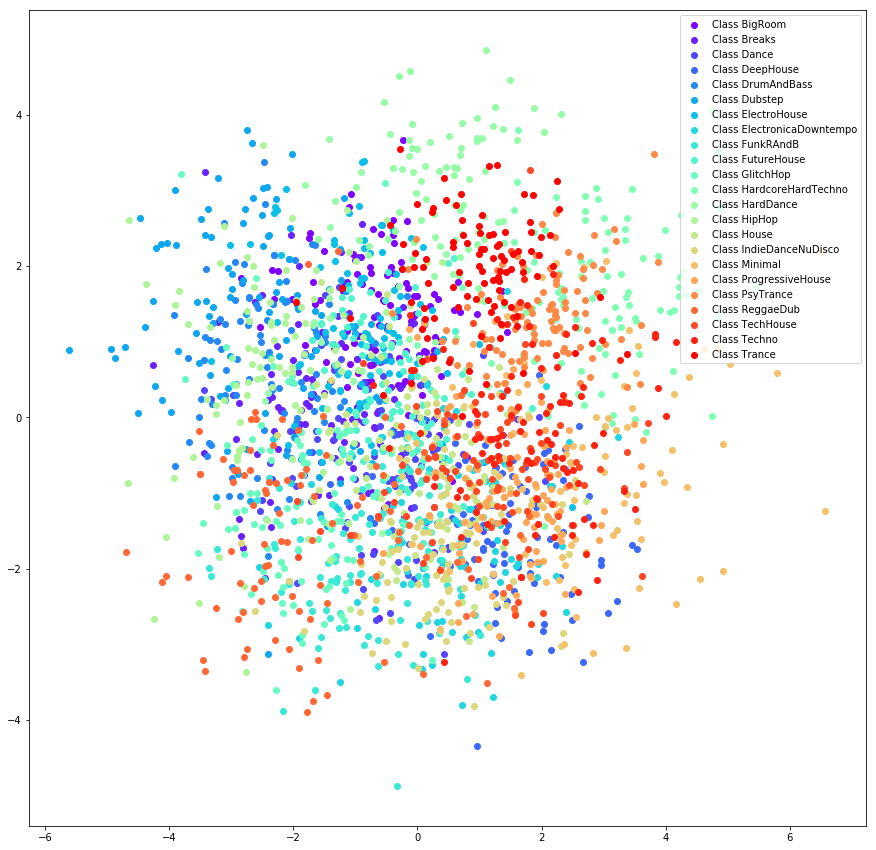

In [14]:
plt.figure(figsize=(15,15))
plotLDA(X, label)
plt.legend(loc = 1)

In [15]:
def plotPCA(X, label):
    pca = sklearnPCA(n_components=2)
    pca_transformed = pd.DataFrame(pca.fit_transform(X))
    
    n, v = extractLabelInfo(label)
    color=iter(plt.cm.rainbow(np.linspace(0,1,n)))
    for i in range(n):
        label_i = v[i]
        plt.scatter(pca_transformed[label == label_i][0],pca_transformed[label == label_i][1], label='Class '+ label_i, c=next(color))
    

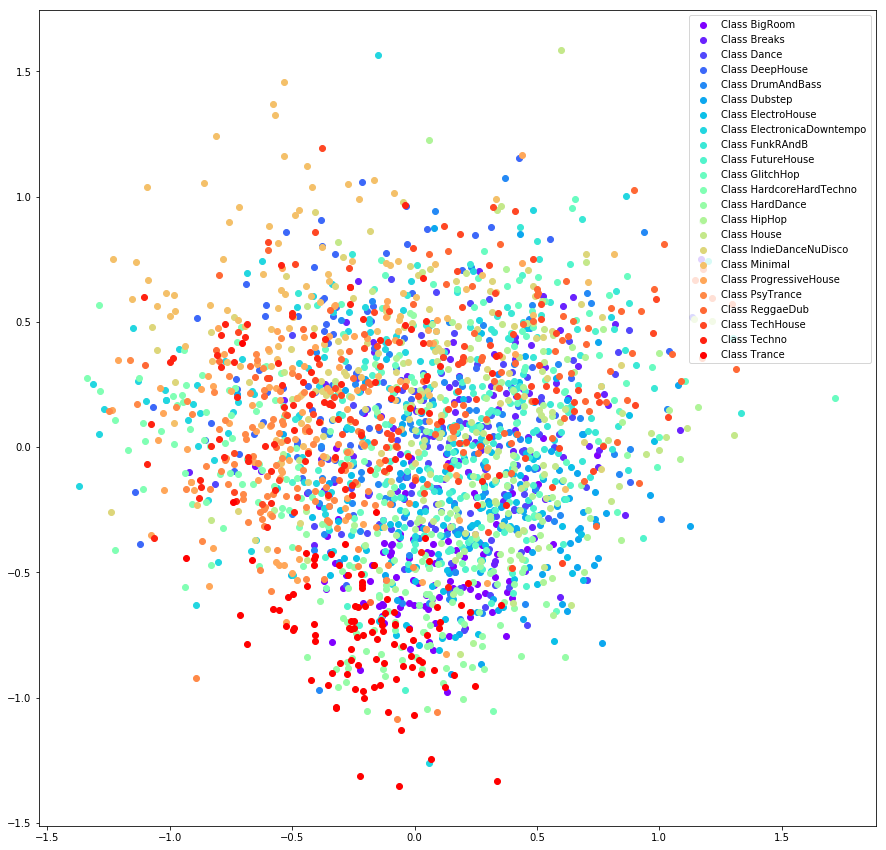

In [16]:
plt.figure(figsize=(15,15))
X_norm = (X - X.min())/(X.max()-X.min())
plotPCA(X_norm, label)
plt.legend(loc = 1)

## Train and apply the classifier

In [5]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
Dnn_1 = Sequential()
# input layer
Dnn_1.add(Dense(100, activation='relu', input_dim = 71))
# hidden layer
Dnn_1.add(Dense(100, activation='relu'))
Dnn_1.add(Dense(100, activation='relu'))
Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(100, activation='relu'))
# Dnn_1.add(Dense(100, activation='relu'))
# Dnn_1.add(Dense(100, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(100, activation='relu'))
# Dnn_1.add(Dense(100, activation='relu'))
# Dnn_1.add(Dense(100, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
# Dnn_1.add(Dense(200, activation='relu'))
Dnn_1.add(Dense(100, activation='relu'))
Dnn_1.add(Dense(23, activation = 'relu'))

#output layer
Dnn_1.add(Dense(23, activation = 'softmax'))

In [48]:
Dnn_1.compile(metrics=['accuracy'], optimizer='Adam', loss='mean_squared_error')

In [49]:
# np.savetxt('./trainData.txt', X_, fmt='%.7e')
# np.savetxt('./trainLabel.txt', label_, fmt='%.5e')

In [50]:
print(X_)
print(label_)

[[9.57526785e-02 7.96823328e-02 2.95949869e+00 ... 1.20000000e+02
  2.27776468e-01 1.27000000e+02]
 [1.74447177e-01 7.56529995e-02 3.10200363e+00 ... 1.33333333e+02
  1.33804533e-01 1.29000000e+02]
 [7.30499968e-02 2.11173841e-01 3.16090546e+00 ... 1.71428571e+02
  1.10342994e-01 8.50000000e+01]
 ...
 [1.13487001e-01 8.44840515e-02 3.12929821e+00 ... 1.20000000e+02
  1.61340206e-01 1.26000000e+02]
 [7.88854396e-02 7.02130693e-02 3.05013742e+00 ... 1.20000000e+02
  1.06934886e-01 1.25000000e+02]
 [1.46132968e-01 7.54275100e-02 3.14651857e+00 ... 1.20000000e+02
  2.09770839e-01 1.25000000e+02]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [57]:
Dnn_1.fit(X_, label_, validation_split = 0.0, epochs = 300, batch_size=50, shuffle = False)

Epoch 1/300
2300/2300 [==============================] - 0s 204us/step - loss: 0.0283 - acc: 0.4996
Epoch 2/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0276 - acc: 0.5230
Epoch 3/300
2300/2300 [==============================] - 0s 196us/step - loss: 0.0268 - acc: 0.5326
Epoch 4/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0275 - acc: 0.5157
Epoch 5/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0269 - acc: 0.5222
Epoch 6/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0277 - acc: 0.5052
Epoch 7/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0282 - acc: 0.4891
Epoch 8/300
2300/2300 [==============================] - 0s 196us/step - loss: 0.0263 - acc: 0.5413
Epoch 9/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0259 - acc: 0.5522
Epoch 10/300
2300/2300 [==============================] - 0s 195us/step - loss: 0.0251 - acc: 0.5739

2300/2300 [==============================] - 0s 208us/step - loss: 0.0243 - acc: 0.5778
Epoch 83/300
2300/2300 [==============================] - 0s 201us/step - loss: 0.0239 - acc: 0.5813
Epoch 84/300
2300/2300 [==============================] - 0s 205us/step - loss: 0.0239 - acc: 0.5791
Epoch 85/300
2300/2300 [==============================] - 0s 205us/step - loss: 0.0239 - acc: 0.5817
Epoch 86/300
2300/2300 [==============================] - 0s 205us/step - loss: 0.0240 - acc: 0.5817
Epoch 87/300
2300/2300 [==============================] - 0s 204us/step - loss: 0.0240 - acc: 0.5761
Epoch 88/300
2300/2300 [==============================] - 0s 207us/step - loss: 0.0231 - acc: 0.6061
Epoch 89/300
2300/2300 [==============================] - 0s 204us/step - loss: 0.0228 - acc: 0.6100
Epoch 90/300
2300/2300 [==============================] - 0s 206us/step - loss: 0.0229 - acc: 0.6026
Epoch 91/300
2300/2300 [==============================] - 0s 205us/step - loss: 0.0234 - acc: 0.5970
Epo

2300/2300 [==============================] - 0s 211us/step - loss: 0.0230 - acc: 0.5974
Epoch 163/300
2300/2300 [==============================] - 0s 213us/step - loss: 0.0228 - acc: 0.6017
Epoch 164/300
2300/2300 [==============================] - 0s 209us/step - loss: 0.0216 - acc: 0.6257
Epoch 165/300
2300/2300 [==============================] - 0s 213us/step - loss: 0.0222 - acc: 0.6083
Epoch 166/300
2300/2300 [==============================] - 0s 209us/step - loss: 0.0223 - acc: 0.6091
Epoch 167/300
2300/2300 [==============================] - 0s 212us/step - loss: 0.0222 - acc: 0.6117
Epoch 168/300
2300/2300 [==============================] - 0s 211us/step - loss: 0.0227 - acc: 0.6096
Epoch 169/300
2300/2300 [==============================] - 0s 213us/step - loss: 0.0213 - acc: 0.6326
Epoch 170/300
2300/2300 [==============================] - 0s 211us/step - loss: 0.0229 - acc: 0.5991
Epoch 171/300
2300/2300 [==============================] - 0s 208us/step - loss: 0.0219 - acc: 0

2300/2300 [==============================] - 0s 203us/step - loss: 0.0227 - acc: 0.6230
Epoch 243/300
2300/2300 [==============================] - 0s 209us/step - loss: 0.0225 - acc: 0.6104
Epoch 244/300
2300/2300 [==============================] - 0s 206us/step - loss: 0.0209 - acc: 0.6461
Epoch 245/300
2300/2300 [==============================] - 0s 209us/step - loss: 0.0191 - acc: 0.6817
Epoch 246/300
2300/2300 [==============================] - 0s 202us/step - loss: 0.0196 - acc: 0.6683
Epoch 247/300
2300/2300 [==============================] - 0s 210us/step - loss: 0.0191 - acc: 0.6817
Epoch 248/300
2300/2300 [==============================] - 0s 212us/step - loss: 0.0182 - acc: 0.6939
Epoch 249/300
2300/2300 [==============================] - 0s 214us/step - loss: 0.0178 - acc: 0.7009
Epoch 250/300
2300/2300 [==============================] - 0s 215us/step - loss: 0.0183 - acc: 0.6965
Epoch 251/300
2300/2300 [==============================] - 0s 208us/step - loss: 0.0190 - acc: 0

## Evaluate the result

In [58]:
Dnn_1.evaluate(X_, label_)

2300/2300 [==============================] - 0s 137us/step


[0.02430559956509134, 0.5882608698761982]

In [54]:
mapping, n = generateMapping(label)
print(mapping)
print(n)

{'IndieDanceNuDisco': 15, 'HardcoreHardTechno': 11, 'Minimal': 16, 'DrumAndBass': 4, 'TechHouse': 20, 'FutureHouse': 9, 'ElectronicaDowntempo': 7, 'House': 14, 'ProgressiveHouse': 17, 'FunkRAndB': 8, 'Trance': 22, 'Dance': 2, 'ReggaeDub': 19, 'ElectroHouse': 6, 'HipHop': 13, 'Breaks': 1, 'PsyTrance': 18, 'Dubstep': 5, 'HardDance': 12, 'GlitchHop': 10, 'BigRoom': 0, 'Techno': 21, 'DeepHouse': 3}
23


In [40]:
# def examLabel(idx):
#     print("right label one-hot-key is:")
#     print(label_[idx])
#     right_label = getLabelStr(label_[idx])
#     print("right edm type is: " + right_label)
    
# for i in range(10,50):
#     examLabel(i)

In [55]:
for i in range(230):
    inDim = X_.shape[1]
    predict = Dnn_1.predict(X_[10*i:10*(i+1)].reshape(10, inDim), batch_size = 10)
#     print(X_[10*i:10*(i+1)].reshape(10, inDim))
    print(predict)

[[1.12751679e-15 9.33058182e-05 2.94646190e-04 1.16276275e-03
  1.54490223e-27 5.98200733e-09 4.20479320e-12 1.87320838e-04
  1.34147704e-04 4.58291615e-04 3.67085978e-23 1.46950526e-07
  1.90759485e-15 3.01913792e-06 8.11417680e-03 5.45475911e-03
  6.93337798e-01 8.52126861e-04 4.67826622e-09 1.95860908e-20
  2.70630598e-01 1.92769319e-02 3.21811143e-18]
 [4.68405671e-02 4.94457692e-01 1.11395186e-02 1.66322498e-05
  1.22630421e-11 1.35506663e-04 1.74340501e-01 5.73834265e-03
  6.74943964e-04 1.78908885e-01 1.31297447e-12 3.05820704e-02
  3.53999640e-05 1.40741048e-03 1.22240353e-02 9.02555767e-04
  2.48908401e-02 2.36565698e-04 1.33257941e-04 6.72910661e-09
  8.87133274e-03 8.16734787e-03 2.96718150e-04]
 [8.17030086e-05 1.28529035e-04 2.22647632e-03 5.00344140e-06
  4.39251848e-02 9.34713334e-03 4.58470196e-04 2.11491697e-02
  8.86451220e-04 2.35160417e-03 6.90693259e-02 2.22661711e-09
  2.82443175e-03 6.42980821e-03 1.49516188e-06 2.28105579e-02
  6.99482262e-05 1.73329870e-04 1.37

[[2.21118611e-07 1.46252123e-05 1.31809493e-05 1.05059287e-03
  1.29631310e-12 6.77744367e-08 6.32071551e-09 9.40082729e-01
  1.69104521e-06 3.37775327e-06 2.08445119e-08 1.27458829e-12
  2.90940427e-08 1.59306474e-05 3.22370468e-08 1.16837060e-03
  1.70966567e-04 5.63918352e-02 1.22441916e-05 3.76380514e-04
  1.38772452e-06 6.72730210e-04 2.35031184e-05]
 [5.50953339e-10 1.11456786e-03 8.74078367e-03 1.69003293e-01
  2.62347359e-16 3.10318574e-04 1.73391133e-08 2.40655988e-02
  8.66358227e-04 5.70782553e-03 5.90383523e-14 5.70555267e-06
  5.82455995e-09 1.12007151e-03 2.08678171e-02 7.85325393e-02
  1.56952038e-01 2.16497779e-01 1.34998656e-04 5.92465356e-12
  1.24619015e-01 1.91461354e-01 9.97297467e-10]
 [8.32214646e-05 8.73789862e-02 5.44189364e-02 4.88535361e-03
  8.80927167e-13 9.16958204e-04 6.90591463e-04 3.50647583e-03
  3.80141847e-03 1.90174460e-01 1.29168833e-12 1.78065374e-02
  9.07843571e-07 2.43242760e-03 3.48749816e-01 4.48179571e-03
  4.17188928e-02 4.85608261e-03 4.15

[[1.14498107e-05 2.54532485e-03 2.75584310e-02 4.48814273e-01
  8.07612878e-07 2.18218081e-02 4.61413329e-05 2.09573004e-02
  9.13836807e-03 3.99473570e-02 4.29263901e-06 3.51362862e-04
  1.17315853e-04 9.05126147e-03 2.86739897e-02 8.73420835e-02
  8.06443542e-02 1.60168022e-01 5.64314146e-03 1.13852093e-05
  3.54767255e-02 2.16526818e-02 2.22308008e-05]
 [6.55616925e-04 1.20177073e-02 2.31403683e-04 1.16081547e-03
  9.87063320e-10 9.21432227e-02 2.83358851e-04 2.24498268e-02
  2.58394653e-06 4.97425317e-05 1.53927693e-13 2.24849563e-02
  1.78237236e-03 9.41529423e-02 1.33385928e-03 8.94664772e-05
  8.41143448e-03 2.63984548e-03 6.24612510e-01 3.85271534e-07
  6.40319334e-03 4.69008973e-03 1.04404584e-01]
 [4.67235982e-01 4.09782454e-02 5.90832299e-03 2.45416159e-05
  5.45142704e-08 3.20175523e-03 2.94280022e-01 1.19288755e-03
  1.76724410e-04 1.68883011e-01 3.40476744e-11 3.14310845e-03
  7.96669512e-04 2.83025345e-03 3.68821644e-03 6.24856984e-05
  1.62312936e-03 1.03782932e-05 3.15

[[2.67097086e-04 2.44277060e-01 3.58785205e-02 5.12064726e-04
  8.85402930e-14 1.35905037e-04 3.29381134e-03 3.03844805e-03
  2.94837076e-03 1.36320680e-01 1.44979352e-13 5.76534010e-02
  6.64014408e-07 1.56738353e-03 2.40595534e-01 2.61761784e-03
  5.00846468e-02 1.47105986e-03 1.45007944e-04 3.11839929e-11
  1.71826795e-01 4.73614112e-02 4.48090714e-06]
 [4.02222760e-03 2.83446759e-01 4.55016532e-04 3.73678319e-02
  2.48877727e-03 2.00285172e-07 1.03289643e-02 2.09600449e-01
  3.55927926e-03 1.92173780e-03 3.04046407e-04 1.04799005e-06
  5.21027192e-04 5.59156251e-05 9.36785713e-02 1.21819321e-03
  3.46784969e-03 1.10860392e-02 5.55506585e-06 4.53223148e-03
  2.67726881e-03 3.28204215e-01 1.05672854e-03]
 [6.13313841e-06 3.24900452e-06 6.17974484e-03 1.82931439e-03
  4.07446387e-05 1.35631853e-05 3.68858964e-05 1.36690869e-04
  2.44511385e-02 1.12734269e-05 7.99247622e-01 2.04221156e-08
  3.18296545e-04 1.23531139e-02 2.56439876e-06 3.63155082e-03
  5.93094795e-04 7.13103782e-06 3.84

[[5.71432197e-03 1.90726034e-02 3.26718241e-02 1.82490889e-02
  9.93838171e-07 1.09973666e-06 2.52703158e-03 4.47530627e-01
  7.98717439e-02 2.21101101e-03 6.07123896e-02 3.64312495e-04
  1.45357044e-05 1.37680303e-03 2.56996206e-03 1.06580898e-01
  2.53970362e-02 1.22616239e-01 6.16755511e-04 2.37267371e-02
  3.30653302e-02 9.57841799e-03 5.53016644e-03]
 [7.22970149e-15 2.37277800e-05 2.88799842e-04 4.06161845e-02
  1.59302819e-21 5.87200361e-07 4.82010742e-12 2.36347341e-03
  1.66763202e-04 1.57865943e-04 1.17752155e-17 4.42233627e-08
  1.60091254e-12 3.91975009e-05 1.75402348e-03 4.91938852e-02
  7.75449991e-01 2.16290373e-02 4.90206617e-07 2.97474774e-15
  8.95714983e-02 1.87443644e-02 1.40039798e-15]
 [1.11726501e-06 5.64568974e-02 2.49194205e-02 1.42196810e-03
  1.20203054e-16 2.95283353e-05 4.51782871e-05 1.76266022e-03
  2.66799354e-03 6.45327643e-02 1.26392467e-15 6.55829953e-03
  9.07606967e-09 6.56437478e-04 3.32303613e-01 3.40275303e-03
  8.93765315e-02 1.55635842e-03 2.38

In [56]:
# def binarySoftmax(pred_label):
#     """
#     Input:
#         prediction np array
#     """
#     idx = np.argmax(pred_label)
    
    
count = 0
for i in range(2300):
    inDim = X_.shape[1]
    predict = Dnn_1.predict(X_[i].reshape(1, inDim), batch_size = 1)
    pred_str = getLabelStr([predict])
    rig_str = getLabelStr([label_[i]])
    
    if(pred_str[0] == rig_str[0]):
        count += 1
    print("right edm type is:\t" + rig_str[0])
    print("prediction type is:\t" + pred_str[0])
    print('\n')
    
accuracy = count/2300
print("the accuracy is: %.4f%%" % (accuracy * 100))

right edm type is:	TechHouse
prediction type is:	Minimal


right edm type is:	House
prediction type is:	Breaks


right edm type is:	HipHop
prediction type is:	ReggaeDub


right edm type is:	PsyTrance
prediction type is:	PsyTrance


right edm type is:	Techno
prediction type is:	House


right edm type is:	DeepHouse
prediction type is:	ProgressiveHouse


right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	Dance
prediction type is:	Dance


right edm type is:	Dubstep
prediction type is:	PsyTrance


right edm type is:	Techno
prediction type is:	Techno


right edm type is:	Breaks
prediction type is:	ProgressiveHouse


right edm type is:	FutureHouse
prediction type is:	FutureHouse


right edm type is:	HipHop
prediction type is:	Dubstep


right edm type is:	HipHop
prediction type is:	HipHop


right edm type is:	ProgressiveHouse
prediction type is:	Minimal


right edm type is:	HardcoreHardTechno
prediction t

right edm type is:	FutureHouse
prediction type is:	House


right edm type is:	HardcoreHardTechno
prediction type is:	Minimal


right edm type is:	Dubstep
prediction type is:	Dubstep


right edm type is:	Dance
prediction type is:	PsyTrance


right edm type is:	Techno
prediction type is:	Breaks


right edm type is:	Dance
prediction type is:	House


right edm type is:	Techno
prediction type is:	Minimal


right edm type is:	House
prediction type is:	House


right edm type is:	Dance
prediction type is:	Dance


right edm type is:	ProgressiveHouse
prediction type is:	ProgressiveHouse


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	HardDance
prediction type is:	HardDance


right edm type is:	PsyTrance
prediction type is:	PsyTrance


right edm type is:	TechHouse
prediction type is:	DeepHouse


right edm type is:	ReggaeDub
prediction type is:	ReggaeDub


right edm type is:	Minimal
prediction type is:	Minimal


right edm type is:	ElectroHouse
prediction type is:	BigRoo

right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	ElectronicaDowntempo
prediction type is:	GlitchHop


right edm type is:	Dubstep
prediction type is:	Dubstep


right edm type is:	ProgressiveHouse
prediction type is:	FutureHouse


right edm type is:	PsyTrance
prediction type is:	PsyTrance


right edm type is:	FutureHouse
prediction type is:	FutureHouse


right edm type is:	ProgressiveHouse
prediction type is:	Minimal


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	ElectronicaDowntempo
prediction type is:	Techno


right edm type is:	Dance
prediction type is:	FutureHouse


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	Minimal
prediction type is:	Minimal


r

right edm type is:	ProgressiveHouse
prediction type is:	ProgressiveHouse


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	BigRoom
prediction type is:	FutureHouse


right edm type is:	ElectronicaDowntempo
prediction type is:	ElectronicaDowntempo


right edm type is:	IndieDanceNuDisco
prediction type is:	IndieDanceNuDisco


right edm type is:	HardDance
prediction type is:	HardDance


right edm type is:	HipHop
prediction type is:	Dubstep


right edm type is:	ElectronicaDowntempo
prediction type is:	ElectronicaDowntempo


right edm type is:	HardDance
prediction type is:	HardDance


right edm type is:	DeepHouse
prediction type is:	FutureHouse


right edm type is:	PsyTrance
prediction type is:	Trance


right edm type is:	FunkRAndB
prediction type is:	House


right edm type is:	PsyTrance
prediction type is:	HardDance


right edm type is:	TechHouse
prediction type is:	Minimal


right edm type is:	Minimal
prediction type is:	Techno


right edm type is:	TechH

right edm type is:	ReggaeDub
prediction type is:	Minimal


right edm type is:	TechHouse
prediction type is:	FutureHouse


right edm type is:	FunkRAndB
prediction type is:	GlitchHop


right edm type is:	PsyTrance
prediction type is:	PsyTrance


right edm type is:	ElectroHouse
prediction type is:	ElectroHouse


right edm type is:	HardDance
prediction type is:	ReggaeDub


right edm type is:	PsyTrance
prediction type is:	PsyTrance


right edm type is:	ElectronicaDowntempo
prediction type is:	ElectronicaDowntempo


right edm type is:	Trance
prediction type is:	Trance


right edm type is:	Minimal
prediction type is:	Techno


right edm type is:	ReggaeDub
prediction type is:	ReggaeDub


right edm type is:	Trance
prediction type is:	ElectronicaDowntempo


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	House
prediction type is:	House


right edm type is:	Dubstep
prediction type is:	Dubstep


right edm type is:	ReggaeDub
prediction type is:	ReggaeDub


right e

right edm type is:	ElectronicaDowntempo
prediction type is:	Minimal


right edm type is:	Techno
prediction type is:	DeepHouse


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	PsyTrance
prediction type is:	Trance


right edm type is:	HipHop
prediction type is:	ElectronicaDowntempo


right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	Trance
prediction type is:	PsyTrance


right edm type is:	ProgressiveHouse
prediction type is:	Minimal


right edm type is:	Techno
prediction type is:	Breaks


right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	Dance
prediction type is:	ReggaeDub


right edm type is:	TechHouse
prediction type is:	FutureHouse


right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	House
prediction type is:	IndieDanceNuDisco


right edm type is:	Minimal
prediction type is:	Minimal


right edm type is:	ElectroHouse
prediction type is:	FutureHouse


right edm type is:

right edm type is:	Trance
prediction type is:	Trance


right edm type is:	HardcoreHardTechno
prediction type is:	HardcoreHardTechno


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	FutureHouse
prediction type is:	BigRoom


right edm type is:	FutureHouse
prediction type is:	FutureHouse


right edm type is:	HipHop
prediction type is:	Dubstep


right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	FunkRAndB
prediction type is:	FutureHouse


right edm type is:	TechHouse
prediction type is:	Minimal


right edm type is:	DeepHouse
prediction type is:	DeepHouse


right edm type is:	House
prediction type is:	House


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	Trance
prediction type is:	Trance


right edm type is:	Techno
prediction type is:	Minimal


right edm type is:	TechHouse
prediction type is:	Minimal


right edm type is:	GlitchHop
prediction 

right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	Techno
prediction type is:	TechHouse


right edm type is:	HipHop
prediction type is:	GlitchHop


right edm type is:	ElectronicaDowntempo
prediction type is:	FutureHouse


right edm type is:	House
prediction type is:	House


right edm type is:	TechHouse
prediction type is:	TechHouse


right edm type is:	HardDance
prediction type is:	HipHop


right edm type is:	DeepHouse
prediction type is:	DeepHouse


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	ReggaeDub
prediction type is:	Breaks


right edm type is:	FutureHouse
prediction type is:	BigRoom


right edm type is:	FutureHouse
prediction type is:	FutureHouse


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	ElectronicaDowntempo
prediction type is:	ElectronicaDowntempo


right edm type is:	ReggaeDub
prediction type is:	ReggaeDub


right edm t

right edm type is:	FunkRAndB
prediction type is:	IndieDanceNuDisco


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	IndieDanceNuDisco
prediction type is:	IndieDanceNuDisco


right edm type is:	HipHop
prediction type is:	HipHop


right edm type is:	ElectronicaDowntempo
prediction type is:	ElectronicaDowntempo


right edm type is:	DeepHouse
prediction type is:	TechHouse


right edm type is:	DrumAndBass
prediction type is:	DrumAndBass


right edm type is:	Trance
prediction type is:	Trance


right edm type is:	DeepHouse
prediction type is:	ProgressiveHouse


right edm type is:	ReggaeDub
prediction type is:	ReggaeDub


right edm type is:	ReggaeDub
prediction type is:	DrumAndBass


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	Trance
prediction type is:	Trance


right edm type is:	IndieDanceNuDisco
prediction type is:	IndieDanceNuDisco


right edm type is:	Dubstep
prediction type is:	IndieDanceNuDisco


right edm type is:	HipHop
predicti

right edm type is:	Techno
prediction type is:	Minimal


right edm type is:	Dubstep
prediction type is:	Breaks


right edm type is:	ElectronicaDowntempo
prediction type is:	ElectronicaDowntempo


right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	BigRoom
prediction type is:	FutureHouse


right edm type is:	Techno
prediction type is:	TechHouse


right edm type is:	PsyTrance
prediction type is:	PsyTrance


right edm type is:	House
prediction type is:	DeepHouse


right edm type is:	ProgressiveHouse
prediction type is:	Techno


right edm type is:	DeepHouse
prediction type is:	DeepHouse


right edm type is:	DeepHouse
prediction type is:	Minimal


right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	FunkRAndB
prediction type is:	Dance


right edm type is:	HipHop
prediction type is:	GlitchHop


right edm type is:	Dance
prediction type is:	DeepHouse


right edm type is:	FutureHouse
prediction type is:	Breaks


right edm type is:	ReggaeDub


right edm type is:	BigRoom
prediction type is:	BigRoom


right edm type is:	GlitchHop
prediction type is:	GlitchHop


right edm type is:	HardcoreHardTechno
prediction type is:	Breaks


right edm type is:	TechHouse
prediction type is:	DeepHouse


right edm type is:	DeepHouse
prediction type is:	ProgressiveHouse


right edm type is:	Minimal
prediction type is:	Minimal


right edm type is:	FutureHouse
prediction type is:	FutureHouse


right edm type is:	FunkRAndB
prediction type is:	FutureHouse


right edm type is:	Breaks
prediction type is:	Breaks


right edm type is:	DeepHouse
prediction type is:	DeepHouse


right edm type is:	Techno
prediction type is:	Minimal


right edm type is:	ReggaeDub
prediction type is:	ReggaeDub


right edm type is:	House
prediction type is:	IndieDanceNuDisco


right edm type is:	ElectronicaDowntempo
prediction type is:	House


right edm type is:	House
prediction type is:	House


right edm type is:	Dubstep
prediction type is:	Dubstep


right edm type is:	HardDa

In [60]:
Dnn_1.save('./dnn_1.h5')